# Multi Attribute Value Theory

This notebook is dedicated to the use of MAVT algorithms, including aggregators like the weighted sum, but also the disaggregators of the UTA algorithmic family.

In [1]:
%matplotlib notebook
%config Completer.use_jedi = False

## MAVT problem formalization

We first need to define our decision problem within the MAVT framework:
* Alternatives
* Criteria
* Performance table
* Criteria scales

The following uses the car choice example from:

E. Jacquet-Lagrèze and Y. Siskos. *Assessing a set of additive utility functions for multicriteria decision making: The UTA method*. European  Journal of Operational Research, 10(2): 151–164, 1982

In [2]:
from pandas import DataFrame
from mcda.core.scales import *
from mcda.core.relations import RelationType

In [3]:
alternatives = [
    "Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas",
    "Mercedes 230",
    "BMW 520",
    "Volvo 244 DL",
    "Peugeot 104 ZS",
    "Citroen Dyane"
]

In [4]:
criteria = [
    "MaximalSpeed",
    "ConsumptionTown",
    "Consumption120kmh",
    "HP",
    "Space",
    "Price"
]

In [5]:
performance_table = DataFrame(
    [
        [173, 11.4, 10.01, 10, 7.88, 49500],
        [176, 12.3, 10.48, 11, 7.96, 46700],
        [142, 8.2, 7.3, 5, 5.65, 32100],
        [148, 10.5, 9.61, 7, 6.15, 39150],
        [178, 14.5, 11.05, 13, 8.06, 64700],
        [180, 13.6, 10.4, 13, 8.47, 75700],
        [182, 12.7, 12.26, 11, 7.81, 68593],
        [145, 14.3, 12.95, 11, 8.38, 55000],
        [161, 8.6, 8.42, 7, 5.11, 35200],
        [117, 7.2, 6.75, 3, 5.81, 24800]
    ],
    index=alternatives,
    columns=criteria
)

In [6]:
scales = {
    criteria[0]: QuantitativeScale(110, 190),
    criteria[1]: QuantitativeScale(7, 15, PreferenceDirection.MIN),
    criteria[2]: QuantitativeScale(6, 13, PreferenceDirection.MIN),
    criteria[3]: QuantitativeScale(3, 13),
    criteria[4]: QuantitativeScale(5, 9),
    criteria[5]: QuantitativeScale(20000, 80000, PreferenceDirection.MIN)
}

## Aggregators

### Weighted sum


In [7]:
import mcda.core.performance_table as ptable
from mcda.mavt.aggregators import weighted_sum

Which is perhaps the easiest and simplest MCDA method requires setting the user preferences using a set of criterion weights:

In [8]:
criteria_weights = {
    criteria[0]: 1,
    criteria[1]: 5,
    criteria[2]: 2,
    criteria[3]: 1,
    criteria[4]: 4,
    criteria[5]: 4
}

Then all is set to apply the weighted sum.

In [9]:
alternatives_grades = weighted_sum(performance_table, scales, criteria_weights)
alternatives_grades

Peugeot 505 GR             9.505119
Opel Record 2000 LS        9.212500
Citroen Visa Super E      10.321905
VW Golf 1300 GLS           8.529405
Citroen CX 2400 Pallas     6.799643
Mercedes 230               7.249524
BMW 520                    6.919395
Volvo 244 DL               6.735952
Peugeot 104 ZS             9.442738
Citroen Dyane             11.238214
dtype: float64

We have obtained the alternatives' scores, according to the criteria weights chosen.

We can now sort the alternatives according to these scores.

In [10]:
alternatives_grades.sort_values(ascending=False)

Citroen Dyane             11.238214
Citroen Visa Super E      10.321905
Peugeot 505 GR             9.505119
Peugeot 104 ZS             9.442738
Opel Record 2000 LS        9.212500
VW Golf 1300 GLS           8.529405
Mercedes 230               7.249524
BMW 520                    6.919395
Citroen CX 2400 Pallas     6.799643
Volvo 244 DL               6.735952
dtype: float64

## Choquet integral

In [11]:
from mcda.core.set_functions import uniform_capacity
from mcda.mavt.aggregators import (
    choquet_integral_capacity,
    choquet_integral_mobius
)

We need to define the capacity related to the set of criteria of the problem. This version of the package has not yet implemented a way to elicit a capacity.
Hence the following test will be achieved with the uniform capacity:

In [12]:
capacity = uniform_capacity(len(criteria))

Now we can compute the aggregated score of each alternative using the Choquet integral on the normalized performance table with the uniform capacity.

In [13]:
t = ptable.normalize(performance_table, scales)
alternatives_grades = t.apply(
    lambda x: choquet_integral_capacity(x, capacity),
    axis=1
)
alternatives_grades

Peugeot 505 GR            0.598829
Opel Record 2000 LS       0.602917
Citroen Visa Super E      0.537520
VW Golf 1300 GLS          0.481687
Citroen CX 2400 Pallas    0.535179
Mercedes 230              0.560099
BMW 520                   0.497638
Volvo 244 DL              0.432302
Peugeot 104 ZS            0.544325
Citroen Dyane             0.512976
dtype: float64

We have obtained the alternatives' scores, according to the capacity chosen and the Choquet integral as an aggregator.

We can now sort the alternatives according to these scores.

In [14]:
alternatives_grades.sort_values(ascending=False)

Opel Record 2000 LS       0.602917
Peugeot 505 GR            0.598829
Mercedes 230              0.560099
Peugeot 104 ZS            0.544325
Citroen Visa Super E      0.537520
Citroen CX 2400 Pallas    0.535179
Citroen Dyane             0.512976
BMW 520                   0.497638
VW Golf 1300 GLS          0.481687
Volvo 244 DL              0.432302
dtype: float64

## OWA

In [15]:
from mcda.mavt.aggregators import owa, owa_and_weights

We need to define OWA weights. Here is an example with the extreme *and* weights:

In [16]:
weights = owa_and_weights(len(criteria))

We can use OWA to aggregates normalized performances into alternatives' grades:

In [17]:
alternatives_grades = t.apply(
    lambda x: owa(x, weights),
    axis=1
)
alternatives_grades

Peugeot 505 GR            0.427143
Opel Record 2000 LS       0.337500
Citroen Visa Super E      0.162500
VW Golf 1300 GLS          0.287500
Citroen CX 2400 Pallas    0.062500
Mercedes 230              0.071667
BMW 520                   0.105714
Volvo 244 DL              0.007143
Peugeot 104 ZS            0.027500
Citroen Dyane             0.000000
dtype: float64

We have obtained the alternatives' scores, according to the capacity chosen and the Choquet integral as an aggregator.

We can now sort the alternatives according to these scores.

In [18]:
alternatives_grades.sort_values(ascending=False)

Peugeot 505 GR            0.427143
Opel Record 2000 LS       0.337500
VW Golf 1300 GLS          0.287500
Citroen Visa Super E      0.162500
BMW 520                   0.105714
Mercedes 230              0.071667
Citroen CX 2400 Pallas    0.062500
Peugeot 104 ZS            0.027500
Volvo 244 DL              0.007143
Citroen Dyane             0.000000
dtype: float64

## ULOWA

In [19]:
from mcda.core.functions import FuzzyNumber
from mcda.core.scales import FuzzyScale
from mcda.mavt.aggregators import ulowa

We need to define a ULOWA problem, as well as the weights used during the aggregation. For this we define a fuzzy partition using fuzzy numbers, which we associate to labels inside a fuzzy scale:

In [20]:
fuzzy_sets = [
    FuzzyNumber([0.0, 0.0, 0.0, 2.0]),
    FuzzyNumber([0.0, 2.0, 2.0, 5.0]),
    FuzzyNumber([2.0, 5.0, 5.0, 6.0]),
    FuzzyNumber([5.0, 6.0, 6.0, 7.0]),
    FuzzyNumber([6.0, 7.0, 8.0, 9.0]),
    FuzzyNumber([8.0, 9.0, 9.0, 10.0]),
    FuzzyNumber([9.0, 10.0, 10.0, 10.0])
]
labels = ["VL", "L", "M", "AH", "H", "VH", "P"]
uscale = FuzzyScale(labels, fuzzy_sets)

uweights = [0.0, 0.0, 0.5, 0.5, 0.0]

ualternatives = ["Caleta", "Tarakon", "Dominos", "Ancora", "Frida", "Cucafera"]
ucriteria = ["Food", "Service", "Atmosphere", "Category", "Location"]

uperformance_table = DataFrame(
    [
        ["VL", "VL", "P", "H", "VL"],
        ["VL", "VL", "H", "P", "P"],
        ["VL", "VL", "L", "M", "L"],
        ["VH", "L", "H", "H", "AH"],
        ["P", "L", "H", "L", "AH"],
        ["P", "VL", "VL", "M", "AH"]
    ],
    index=ualternatives,
    columns=ucriteria
)

As ULOWA has been designed for fuzzy partition, we can check that our fuzzy scale does define such partition:

In [21]:
uscale.is_fuzzy_partition()

True

Now, we can compute the ULOWA result for each alternative.

In [22]:
results1 = uperformance_table.apply(
    lambda x: ulowa(x, uweights, uscale),
    axis=1
)
results1

Caleta      VL
Tarakon      M
Dominos     VL
Ancora      AH
Frida        M
Cucafera     L
dtype: object

We can also compute some measures to characterize the fuzzy numbers w.r.t to the boundaries of the scale.

In [23]:
data = [uscale.fuzziness(fz) for fz in fuzzy_sets]
print(data)

[0.1, 0.25, 0.2, 0.1, 0.1, 0.1, 0.05]


In [24]:
data = [uscale.specificity(fz) for fz in fuzzy_sets]
print(data)

[0.9, 0.75, 0.8, 0.9, 0.8, 0.9, 0.95]


Now let's change the weights and recompute ULOWA.

In [25]:
uweights = [0.2, 0.6, 0.2, 0.0, 0.0]
results2 = uperformance_table.apply(
    lambda x: ulowa(x, uweights, uscale),
    axis=1
)
results2

Caleta      AH
Tarakon     VH
Dominos      L
Ancora       H
Frida        H
Cucafera    AH
dtype: object

## Disaggregators

### UTA

In [26]:
from mcda.mavt.uta import uta

This method infers the user model of preferences as marginal utility functions, which can then be used to score each alternatives' criterion performance. We can infer the global score of each alternative by summing those marginal utility values.

Those marginal utility functions are piecewise linear functions.

The algorithm requires the following:
* The number of segments to use for each marginal utility function (per criterion)
* The pair-wise preference/indifference relations representing the user preferences

In [27]:
criteria_segments = {
    criteria[0]: 5,
    criteria[1]: 4,
    criteria[2]: 4,
    criteria[3]: 5,
    criteria[4]: 4,
    criteria[5]: 5
}

In [28]:
relations = [
    (alternatives[i], alternatives[i+1], RelationType.PREFERENCE) for i in range(len(alternatives)-1)
]  # Meaning alternatives are already ordered by preference

We have everything we need to apply UTA:

In [29]:
functions = uta(
    performance_table, scales, criteria_segments, relations, delta=0.01
)  # 'delta' is the preference threshold 

We can plot those marginal utility functions for a better understanding of UTA's results.

In [30]:
import mcda.plot as pplot

<IPython.core.display.Javascript object>


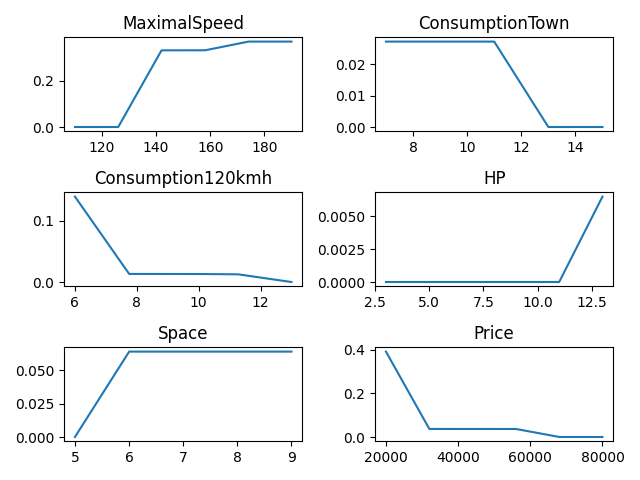

In [31]:
fig = pplot.Figure(ncols=2)
for i in criteria:
    x = scales[i].range(500)
    y = [functions[i](xx) for xx in x]
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(pplot.LinePlot(x, y))
fig.draw()

We can apply those marginal utility functions as criteria functions to the performance table, to obtain the table of marginal scores.

In [32]:
res = ptable.apply_criteria_functions(performance_table, functions)
res

MaximalSpeed  ConsumptionTown  Consumption120kmh  \
Peugeot 505 GR              0.368427         0.021762           0.013051   
Opel Record 2000 LS         0.370797         0.009521           0.012922   
Citroen Visa Super E        0.332877         0.027202           0.045632   
VW Golf 1300 GLS            0.332877         0.027202           0.013161   
Citroen CX 2400 Pallas      0.370797        -0.000000           0.012766   
Mercedes 230                0.370797        -0.000000           0.012944   
BMW 520                     0.370797         0.004080           0.005375   
Volvo 244 DL                0.332877        -0.000000           0.000363   
Peugeot 104 ZS              0.339987         0.027202           0.013191   
Citroen Dyane              -0.000000         0.027202           0.085281   

                              HP     Space     Price  
Peugeot 505 GR         -0.000000  0.064203  0.037012  
Opel Record 2000 LS    -0.000000  0.064203  0.037012  
Citroen Visa Super E   -0.000000  0.041732  0.037012  
VW Golf 1300 GLS       -0.000000  0.064203  0.037012  
Citroen CX 2400 Pallas  0.006511  0.064203  0.010178  
Mercedes 230            0.006511  0.064203 -0.000000  
BMW 520                -0.000000  0.064203 -0.000000  
Volvo 244 DL           -0.000000  0.064203  0.037012  
Peugeot 104 ZS         -0.000000  0.007062  0.037012  
Citroen Dyane          -0.000000  0.052004  0.249967

We can sum those marginal values to obtain one global score per alternative.
You can see that in our case, UTA keeps the same order of alternatives.

In [33]:
alternatives_grades = ptable.sum_table(res, axis = 1)
alternatives_grades

Peugeot 505 GR            0.504455
Opel Record 2000 LS       0.494455
Citroen Visa Super E      0.484455
VW Golf 1300 GLS          0.474455
Citroen CX 2400 Pallas    0.464455
Mercedes 230              0.454455
BMW 520                   0.444455
Volvo 244 DL              0.434455
Peugeot 104 ZS            0.424455
Citroen Dyane             0.414455
dtype: float64

We can now sort the alternatives according to these scores.

In [34]:
alternatives_grades.sort_values(ascending=False)

Peugeot 505 GR            0.504455
Opel Record 2000 LS       0.494455
Citroen Visa Super E      0.484455
VW Golf 1300 GLS          0.474455
Citroen CX 2400 Pallas    0.464455
Mercedes 230              0.454455
BMW 520                   0.444455
Volvo 244 DL              0.434455
Peugeot 104 ZS            0.424455
Citroen Dyane             0.414455
dtype: float64